# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Instruct_pix2pix

/content/drive/MyDrive/Instruct_pix2pix


# Setup

In [3]:
import pandas as pd
from openai import OpenAI
import time
import json
import glob
import numpy as np

from tqdm import tqdm
from PIL import Image
from IPython.display import clear_output, display

# Create Simplified Caption with ChatGPT

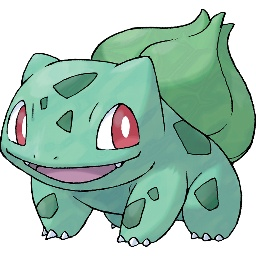

Pokemon_Name: 0.jpg
Original_Caption: a drawing of a green pokemon with red eyes and a green tail, cheerful expression, bulbasaur, my computer icon, vibrant greenery, transparent background, aliased, he is smiling, 2014, transparent goo, cheerful, ivy, 2 4 years old, him, adopt
Modifed_Caption: Turn it into a vibrant drawing of a cheerful Bulbasaur with red eyes and a green tail, set against a transparent background with lush greenery, resembling a computer icon from 2014.


In [9]:
df = pd.read_csv('./desc.csv')

images = df['image'].tolist()
prompts = df['prompt'].tolist()

client = OpenAI(api_key='Change to your OpenAI KEY')

def getTextFromGPT(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o",
        max_tokens = 256,
        temperature = 0.7,
        top_p = 1.0,
        frequency_penalty = 0.1,
        presence_penalty = 0.0,
        messages=[
            {"role": "system",
            "content": "Modify the given caption by prepending 'Turn it into' and refining the wording to make it more natural and descriptive, while ensuring it remains a single concise sentence. Only return the modified caption without any additional formatting or explanation."
  },
            {
                "role": "user",
                "content":f"{prompt}",
            },
        ],
    )

    response = completion.choices[0].message.content
    return response


def visualize(img_path):
    imgs = df['image'].tolist()
    # for img in imgs:
    #     image = Image.open(img_path + img).convert('RGB')
    #     thumb = image.copy()
    #     thumb.thumbnail([256, 256])
    #     return display(thumb)

    image = Image.open(img_path + f'{imgs[0]}').convert('RGB') #Check first image
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    return display(thumb)


visualize('./images/')
print('Pokemon_Name:',images[0])
print('Original_Caption:',prompts[0])
print('Modifed_Caption:', getTextFromGPT(prompts[0]))


# Save Modified Caption

In [ ]:
df = pd.read_csv('./desc.csv')
prompts = df['prompt'].tolist()

client = OpenAI(api_key='Change to your OpenAI KEY')

def getTextFromGPT(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o",
        max_tokens = 256,
        temperature = 0.7,
        top_p = 1.0,
        frequency_penalty = 0.1,
        presence_penalty = 0.0,
        messages=[
            {"role": "system",
            "content": "Modify the given caption by prepending 'Turn it into' and refining the wording to make it more natural and descriptive, while ensuring it remains a single concise sentence. Only return the modified caption without any additional formatting or explanation."
  },
            {
                "role": "user",
                "content":f"{prompt}",
            },
        ],
    )

    response = completion.choices[0].message.content
    return response


modified_prompts = []
for prompt in prompts:
  modified_prompts.append(getTextFromGPT(prompt))

# 수정된 캡션을 새 컬럼에 저장
df['modified_prompt'] = modified_prompts

# 수정된 DataFrame을 새로운 CSV 파일로 저장
df.to_csv('./desc_modified.csv', index=False)

print("Modified captions saved to 'desc_modified.csv'")

Modified captions saved to 'desc_modified.csv'
